In [62]:
from PIL import Image
import matplotlib.pyplot as plt
import glob
import numpy as np
import json
import seaborn as sns

In [11]:
img_paths = glob.glob('../../sample_imgs/*.jp*')
print(len(img_paths))

50


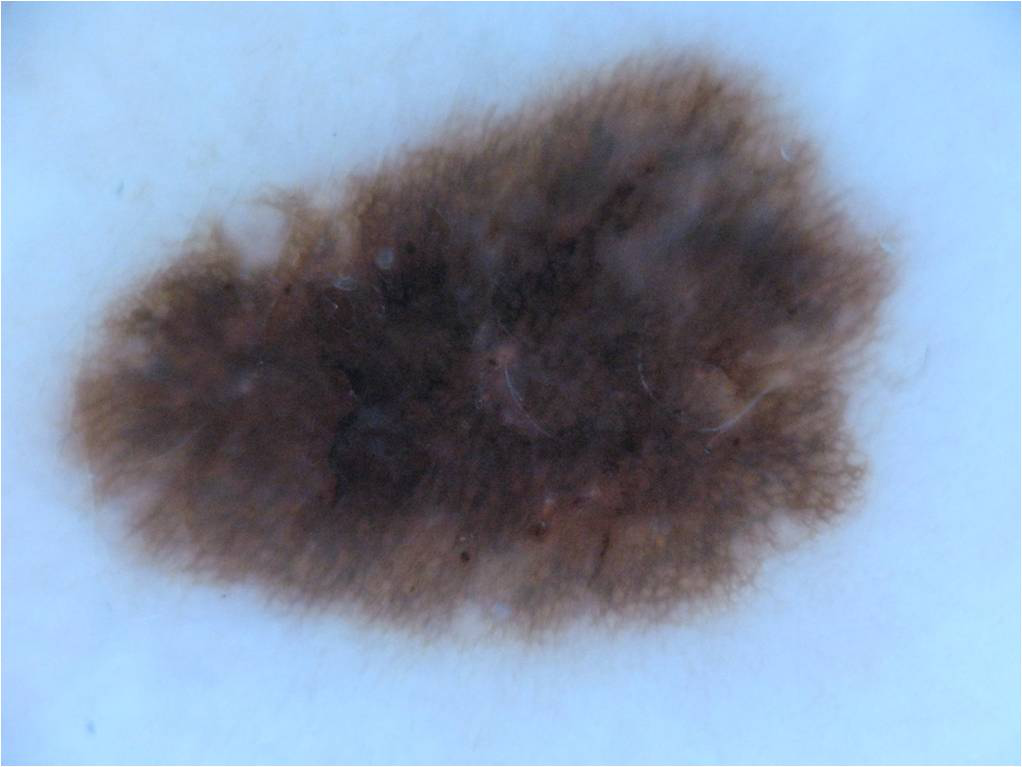

In [17]:
img0 = Image.open(img_paths[0])
img0

 just one value for the whole image seems wild, considering there are two dimensions of the image: what if it’s a white-ass dude with a small jet-black lesion? Average intensity could be low even though the coloration of the actual lesion is high -- the search continues...maybe the poor result is part of the point of the “novice” tutorial, image sizes also not equal


50


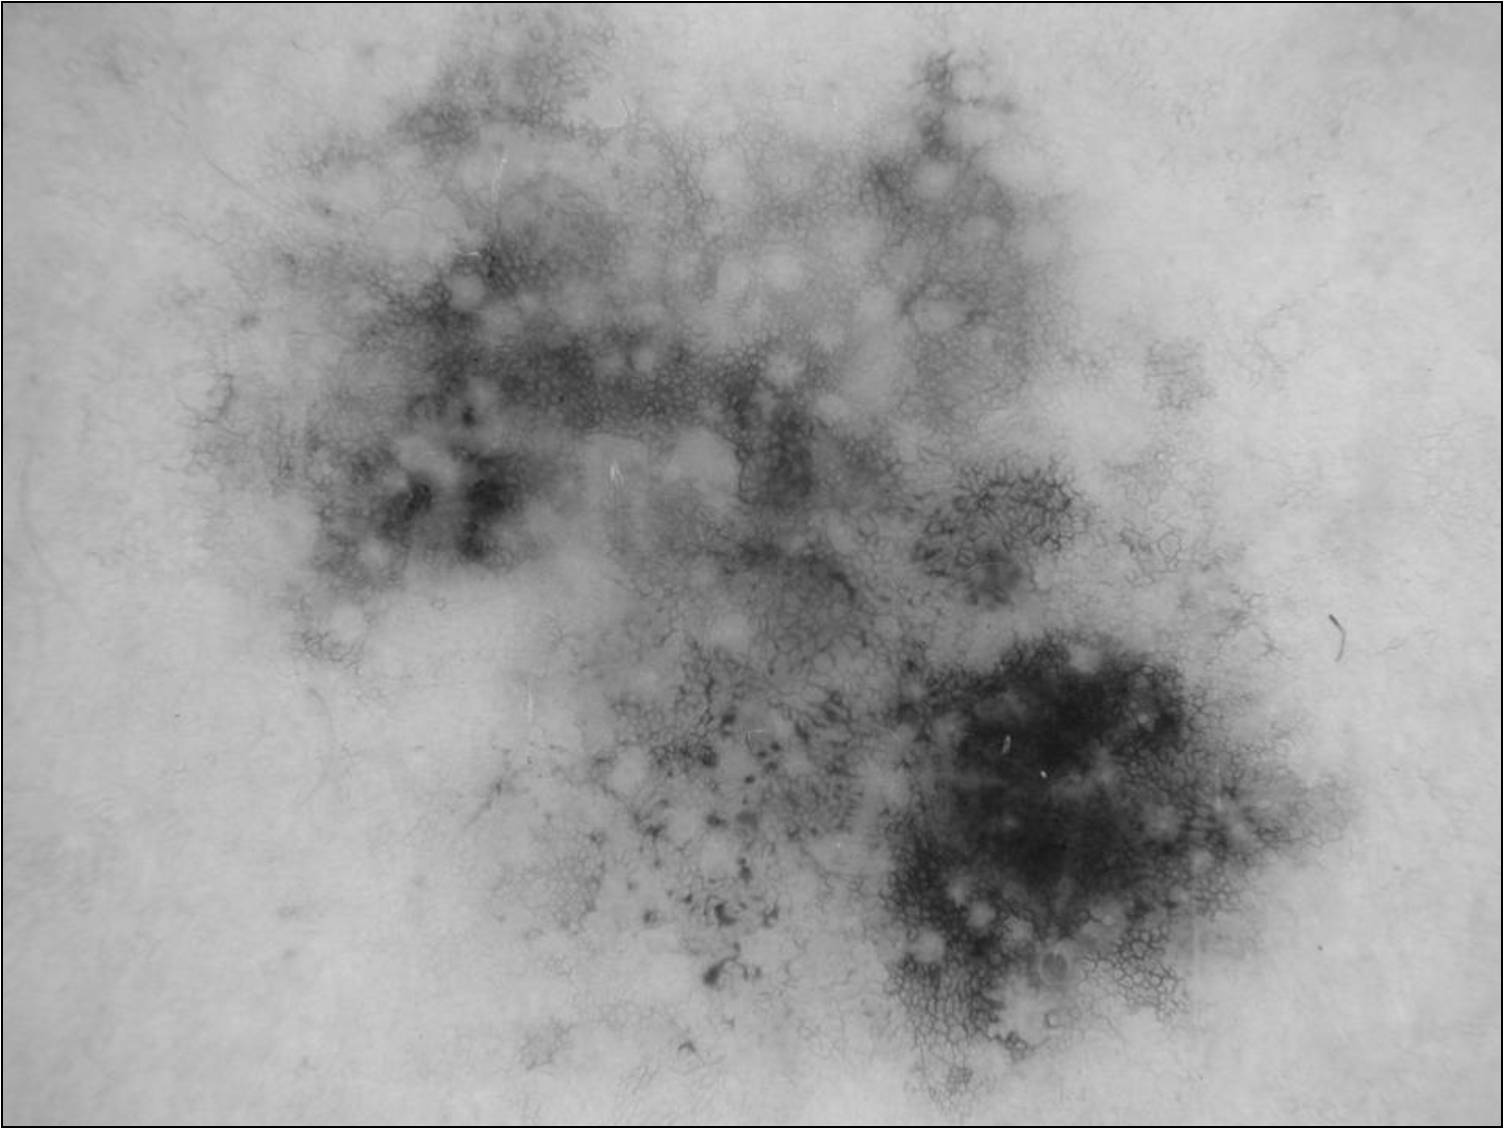

In [16]:
imgs = [Image.open(x).convert('L') for x in img_paths]
print(len(imgs))
imgs[-1]

In [23]:
np_imgs = [np.array(i) for i in imgs]
np_imgs[0]

array([[254, 239, 251, ..., 250, 247, 255],
       [234, 182, 178, ..., 198, 197, 246],
       [250, 179, 161, ..., 183, 186, 250],
       ...,
       [250, 195, 187, ..., 213, 212, 251],
       [242, 193, 193, ..., 219, 214, 248],
       [253, 243, 253, ..., 250, 242, 255]], dtype=uint8)

In [34]:
intensities = [np.mean(x) for x in np_imgs]

In [35]:
# better system (maybe for later) - glob the description files and get the id from there
# then make sure that each image you read matches the name of the description file
# so we know that always, the image and description are referring to the same thing
# e.g., image 001 = desc 001
# maybe not necessary because of how the downloader tool works

In [38]:
dsc_paths = glob.glob('../../sample_dscs/*')
print(len(dsc_paths))
dsc_paths[0]

50


'../../sample_dscs/ISIC_0000000'

In [41]:
with open(dsc_paths[0], 'r') as f:
    dsc0 = json.load(f)
dsc0

{'_id': '5436e3abbae478396759f0cf',
 '_modelType': 'image',
 'created': '2014-10-09T19:36:11.989000+00:00',
 'creator': {'_id': '5450e996bae47865794e4d0d', 'name': 'User 6VSN'},
 'dataset': {'_accessLevel': 0,
  '_id': '5a2ecc5e1165975c945942a2',
  'description': 'Moles and melanomas.\nBiopsy-confirmed melanocytic lesions. Both malignant and benign lesions are included.',
  'license': 'CC-0',
  'name': 'UDA-1',
  'updated': '2014-11-10T02:39:56.492000+00:00'},
 'meta': {'acquisition': {'image_type': 'dermoscopic',
   'pixelsX': 1022,
   'pixelsY': 767},
  'clinical': {'age_approx': 55,
   'anatom_site_general': 'anterior torso',
   'benign_malignant': 'benign',
   'diagnosis': 'nevus',
   'diagnosis_confirm_type': None,
   'melanocytic': True,
   'sex': 'female'}},
 'name': 'ISIC_0000000',
 'notes': {'reviewed': {'accepted': True,
   'time': '2014-11-10T02:39:56.492000+00:00',
   'userId': '5436c6e7bae4780a676c8f93'},
  'tags': ['Challenge 2018: Task 1-2: Training',
   'Challenge 2019:

__note how desc says both malignant and benign lesions included but benign flag says benign__

In [59]:
dscs = [json.load(open(x, 'r')) for x in dsc_paths]
flags = [x['meta']['clinical']['benign_malignant'] for x in dscs]
flags

['benign',
 'benign',
 'malignant',
 'benign',
 'malignant',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'malignant',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'malignant',
 'benign',
 'benign',
 'benign',
 'malignant',
 'benign',
 'benign',
 'malignant',
 'malignant',
 'malignant',
 'benign',
 'benign',
 'benign',
 'malignant',
 'malignant',
 'benign',
 'benign',
 'benign',
 'malignant',
 'benign',
 'benign',
 'malignant',
 'benign',
 'benign',
 'malignant',
 'benign',
 'benign',
 'malignant']

__are the other things important? like notes, accepted=True? what's it mean re: validity?__

In [57]:
# code malignant as 1, benign as 0
# flags = [1 if x=='malignant' else 0 for x in flags]
# flags

[0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1]

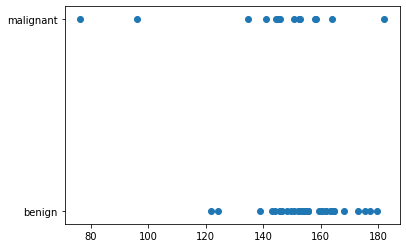

In [61]:
plt.scatter(intensities, flags) # before turning to 0/1
# I wonder if violin plots rather than 0/1 would help

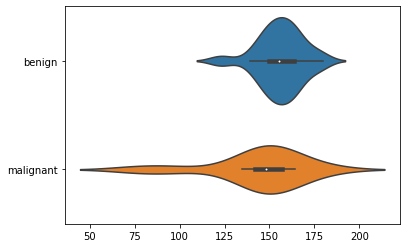

In [64]:
sns.violinplot(intensities,flags) # need to validate 